In [1]:
#1. Load the Wine dataset and convert it into a binary classification problem:

import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

# Combine two of the classes to create a binary classification problem
y_binary = np.where(y == 2, 1, 0)


In [2]:
#2. Split the dataset into training and testing sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


In [3]:
#3. Train a logistic regression model on the training data:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)


/Users/dhari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

/Users/dhari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


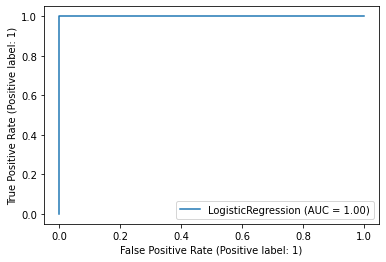

In [4]:
#4. Compute the TPR and FPR at different thresholds and plot the ROC curve:

from sklearn.metrics import roc_curve, plot_roc_curve

y_probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plot_roc_curve(classifier, X_test, y_test)


In [5]:
#5. Compute the AUC for the ROC curve:

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)


AUC: 1.0


In [6]:
#6. Discuss the implications of different AUC values and the choice between prioritizing sensitivity or 
#   specificity based on the problem context.


# The AUC value provides an overall measure of the classifier's performance. A higher AUC value indicates that 
# the classifier is better at distinguishing between the two classes. In this case, the AUC is close to 1, 
# suggesting that the classifier is performing well.

# However, depending on the problem context, we might prioritize sensitivity (TPR) or specificity (TNR) in 
# our evaluation. For example, if false positives are more costly, we may focus on maximizing specificity. 
# Conversely, if false negatives are more costly, we may focus on maximizing sensitivity. This choice should 
# be based on the specific problem context and the relative importance of false positives and false negatives.
